# 搭建一个简单的神经网络
关于这一节内容可以去看BP神经网络模型的介绍，加深理解。
相关介绍
> keras 是 TensorFlow 的一个子项目，是一个用于构建和训练机器学习模型的高级API。
> 
> Keras.model是 Keras 库中的一个模块，它主要用于构建和操作深度学习模型。
> 
> Keras.layers是 Keras 库中的一个模块，它主要用于构建和操作神经网络层。其中Dense是Keras.layers中的一个类，它用于构建全连接层。
> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from simpleNeuralNetworkUtil import load_data
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
X ,Y = load_data()

In [3]:
X.shape, Y.shape

((200, 2), (200, 1))

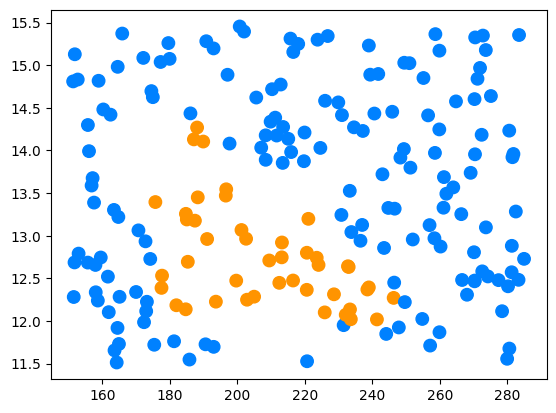

In [4]:
flt, ax = plt.subplots(1, 1)
ax.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=80, cmap='jet', vmin=-0.5, vmax=1.5)
plt.show()

keras.layers.Normalization() 是 Keras 库中的一个类，它用于对输入数据进行归一化处理。
> 
> tf.keras.layers.Normalization(axis=-1) 是一个实例化对象，用于对输入数据进行归一化处理。
> 
> axis=-1 表示对最后一个轴进行归一化处理。
> 
> norm_1.adapt(X) 用于根据输入数据进行归一化处理。
> 
> Xn = norm_1(X) 用于对输入数据进行归一化处理。

归一化原理：归一化是将数据映射到同一比例上，使得数据在某个范围内具有相同的权重。

In [6]:
print(f"Temperature Max, Min pre normalization:{np.max(X[:, 0]):0.2f},{np.min(X[:, 0]):0.2f}")
print(f"Duration    Max, Min pre normalization:{np.max(X[:, 1]):0.2f},{np.min(X[:, 1]):0.2f}")
norm_1 = tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(X)
Xn = norm_1(X)
print(f"Temperature Max, Min post normalization:{np.max(Xn[:, 0]):0.2f},{np.min(Xn[:, 0]):0.2f}")
print(f"Duration    Max, Min post normalization:{np.max(Xn[:, 1]):0.2f},{np.min(Xn[:, 1]):0.2f}")

Temperature Max, Min pre normalization:284.99,151.32
Duration    Max, Min pre normalization:15.45,11.51
Temperature Max, Min post normalization:1.66,-1.69
Duration    Max, Min post normalization:1.79,-1.70


np.tile() 用于重复数组的元素。该函数接收两个参数：一个是被重复的数组，另一个是定义重复次数的元组或标量。如果提供的是元组，每个数字对应于原数组对应轴的重复次数。如果提供的是单个整数，则所有轴都按该次数重复。
下方代码是为了扩大数据集，减少训练周期

In [7]:
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


设置种子在神经网络中至关重要，因为神经网络的训练过程通常涉及大量的随机性，这包括但不限于：

1. **权重和偏置的初始化**：神经网络的权重矩阵和偏置通常使用某种随机初始化方法，如Xavier初始化、He初始化等。设置种子确保每次训练开始时，这些初始值是相同的，从而使得训练过程的一致性得以保证。

2. **数据打乱**：在训练时，数据通常会被随机打乱，以避免在批处理训练中出现顺序偏差。设置种子可以确保每次数据集的随机排列是可重复的。

3. **随机梯度下降（SGD）和变体**：在优化过程中，随机梯度下降和其他变体（如Mini-Batch SGD、Momentum、Adam等）涉及随机选择训练样本的批次。种子控制着这些选择，使得每次迭代的顺序相同。

4. **正则化策略**：如dropout或批量归一化等正则化策略中，也有随机性。设置种子可以确保这些策略的随机行为是可重复的。

5. **早期停止**：在使用早期停止策略时，如果训练集和验证集的划分是随机的，设置种子可以确保每次划分是相同的，以便在相同的验证性能下停止训练。

具体工作流程如下：

1. **设置种子**：在训练开始之前，使用 `tf.random.set_seed`（对于TensorFlow）或其他库的相应函数设置全局随机种子，以及可能的Python和NumPy种子。

2. **初始化模型**：模型的权重和偏置根据设定的种子进行初始化。

3. **数据处理**：数据加载器会根据种子打乱数据集，确保每次迭代的数据顺序一致。

4. **训练循环**：在训练过程中，每次梯度更新和正则化操作都会基于相同的随机性进行。

通过设置种子，研究人员和开发者可以复现实验结果，比较不同超参数设置的影响，以及在调试时更容易定位问题。然而，需要注意的是，尽管设置了种子，由于并行计算和分布式系统的复杂性，完全的可重复性可能难以实现，尤其是在大型分布式环境中。


In [8]:
tf.random.set_seed(1234)  # 表示设置随机数种子，保证每次运行结果一样。
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(units=3, activation='sigmoid', name='layer1'),
        Dense(units=1, activation='sigmoid', name='layer2')
    ]
)

model.summary()打印模型结构，包括输入层、隐藏层和输出层的形状和参数数量。

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


关于参数的说明：<br>
1. 第一层的参数数量是$2*3+1*3=9$，其中2是输入维度，3是隐藏层节点数，1是偏置项。<br>
2. 第二层的参数数量是$3*1+1*1=4$，其中3是隐藏层节点数，1是输出维度，1是偏置项。

In [10]:
L1_num_params = 2 * 3 + 1 * 3  # w1*x+b1
L2_num_params = 3 * 1 + 1 * 1  # w2*x+b2
print("L1 number of parameters:", L1_num_params, "L2 number of parameters:", L2_num_params)

L1 number of parameters: 9 L2 number of parameters: 4


In [11]:
w1, b1 = model.get_layer("layer1").get_weights()
w2, b2 = model.get_layer("layer2").get_weights()
print(f"w1{w1.shape}:\n", w1, f"\nb1{b1.shape}:", b1)
print(f"w2{w2.shape}:\n", w2, f"\nb2{b2.shape}:", b2)

w1(2, 3):
 [[ 0.08334005 -0.29660565  0.17884266]
 [-0.56124383 -0.15262699  0.8899205 ]] 
b1(3,): [0. 0. 0.]
w2(3, 1):
 [[-0.4277674 ]
 [-0.88499916]
 [ 0.3626454 ]] 
b2(1,): [0.]


model.compile()是对模型进行编译，包括损失函数和优化器。损失函数是模型在训练过程中用于衡量预测值与真实值之间的差异。优化器是模型在训练过程中用于更新权重和偏置的算法。
其中BinaryCrossentropy是用于二分类问题的交叉熵损失函数。具体的计算公式如下：
$$
\begin{align}
L(\hat{y}, y) = -\sum_{i=1}^{N} \left[ y_i \log ( \hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) \right]
\end{align}
$$
model.fit()是训练模型，包括训练集、训练轮数、学习率等,epochs就是训练轮数。
为什么是6250呢？将数据分成6250份，或者说6250个批次。

In [13]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)
model.fit(
    Xt, Yt,
    epochs=10
)

Epoch 1/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1130
Epoch 2/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0307
Epoch 3/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0151
Epoch 4/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0101
Epoch 5/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0071
Epoch 6/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0051
Epoch 7/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0036
Epoch 8/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0026
Epoch 9/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0019
Epoch 10/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0015


获取模型的拟合结果，该模型可称为单隐层前馈网络。
隐层包括三个神经元，输出层包括一个神经元。

In [14]:
w1, b1 = model.get_layer("layer1").get_weights()
w2, b2 = model.get_layer("layer2").get_weights()
print(f"w1{w1}", f"\nb1{b1}:",)
print(f"w2{w2}", f"\nb2{b2}:",)

w1[[ -0.13483807  14.551356   -11.087352  ]
 [ -9.1622      12.059276    -0.2671539 ]] 
b1[-11.45009     1.8747271 -12.060107 ]:
w2[[-49.827137]
 [-45.443203]
 [-54.28467 ]] 
b2[28.68992]:


对训练后的模型进行预测，并输出预测结果。

In [16]:
X_test = np.array([[200, 13.9],  # positive example
                  [200, 17.5]])  # negative example
X_testn = norm_1(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)


predictions = 
 [[9.9235827e-01]
 [5.1868341e-08]]


In [18]:
y_hat = (predictions >= 0.5).astype(int)
print(f"predictions = \n{y_hat}")

predictions = 
[[1]
 [0]]
